# Tasca M5 T01

Trabajaré sobre el data set de la UEFA que describe datos de los equipos europeos mejor ranqueados.

In [1]:
#Importa las principales librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [2]:
#Cargo el Dataset
df = pd.read_csv('Lligues europees UEFA.csv', sep = ';', encoding = 'ISO-8859-1', header=[0])

df.head()

,Rk,Squad,Country,LgRk,MP,W,D,L,GF,GA,...,Pts,Pts/G,xG,xGA,xGD,xGD/90,Last 5,Attendance,Top Team Scorer,Goalkeeper
0,1,Manchester City,ENG,1,37,28,6,3,96,24,...,90,2.43,86.1,26.8,59.3,1.60,W W W W D,52739,Kevin De Bruyne - 15,Ederson
1,2,Liverpool,ENG,2,36,26,8,2,89,24,...,86,2.39,84.6,33.1,51.4,1.43,W W W D W,53367,Mohamed Salah - 22,Alisson
2,3,Real Madrid,ESP,1,37,26,7,4,80,31,...,85,2.30,73.0,45.8,27.2,0.73,W W L W D,40624,Karim Benzema - 27,Thibaut Courtois
3,4,Bayern Munich,GER,1,34,24,5,5,97,37,...,77,2.26,88.1,37.1,51.0,1.50,W W L D D,33176,Robert Lewandowski - 35,Manuel Neuer
4,5,Paris S-G,FRA,1,37,25,8,4,85,36,...,83,2.24,71.6,38.1,33.4,0.90,W D D D W,41188,Kylian Mbappé - 25,Keylor Navas


Análisis general de los datos: nombre de las columnas, significado de las mismas, tamaño del Dataset, descripción estadística general de cada variables, búsqueda de datos nulos.

In [3]:
df.columns

Index(['Rk', 'Squad', 'Country', 'LgRk', 'MP', 'W', 'D', 'L', 'GF', 'GA', 'GD',
       'Pts', 'Pts/G', 'xG', 'xGA', 'xGD', 'xGD/90', 'Last 5', 'Attendance',
       'Top Team Scorer', 'Goalkeeper'],
      dtype='object')

**Descripción de las columnas**
- Rk: Ranking del club	
- Squad: Nombre del club
- Country:País al que pertenece el equipo
- LgRk: Posición en la terminó el equipo en la liga de su país	
- MP: Partidos jugados durante la temporada
- W: Partidos ganados	
- D: Partidos empatados	
- L: Partidos perdidos	
- GF: Goles a favor	
- GA: Goles en contra	
- GD: Diferencia de goles	
- Pts: Puntos obtenidos	
- Pts/G: Promedio de puntos obtenidos sobre el total de partidos jugados.
- xG: el número de goles esperados de uno o varios jugadores, depende de la calidad de los tiros.
- xGA: la cantidad de goles esperados de los oponentes depende de la calidad de los tiros.
- xGD: la diferencia entre los goles anotados esperados y los fallados esperados. xGD=xG-xGA.
- xGD/90: el número de goles esperados de uno o varios jugadores en 90 minutos.	
- Resultado de los últimos 5 partidos (en ganador, empatados y perdidos)
- Attendance: Número total de asistencias
- Top Team Scorer: Nombre del goleador y cantidad de goles 
- Goalkeeper: Nombre del portero

Para obtener estos datos los siguiente [LINK](https://expectedscore.com/faq/how-to-use-the-xg-tables/)                         

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Rk               98 non-null     int64  
 1   Squad            98 non-null     object 
 2   Country          98 non-null     object 
 3   LgRk             98 non-null     int64  
 4   MP               98 non-null     int64  
 5   W                98 non-null     int64  
 6   D                98 non-null     int64  
 7   L                98 non-null     int64  
 8   GF               98 non-null     int64  
 9   GA               98 non-null     int64  
 10  GD               98 non-null     int64  
 11  Pts              98 non-null     int64  
 12  Pts/G            98 non-null     float64
 13  xG               98 non-null     float64
 14  xGA              98 non-null     float64
 15  xGD              98 non-null     float64
 16  xGD/90           98 non-null     float64
 17  Last 5           9

In [6]:
df.shape

(98, 21)

In [7]:
df.describe()

,Rk,LgRk,MP,W,D,L,GF,GA,GD,Pts,Pts/G,xG,xGA,xGD,xGD/90,Attendance
count,98.000000,98.000000,98.000000,98.000000,98.000000,98.00000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000
mean,49.500000,10.316327,36.306122,13.448980,9.408163,13.44898,50.877551,50.877551,0.000000,49.734694,1.370204,48.653061,48.645918,-0.005102,0.000918,24239.857143
std,28.434134,5.706926,1.152390,5.747474,2.903381,5.12347,16.102933,13.634602,26.501896,16.166371,0.443903,12.453950,9.812481,19.992506,0.551414,14874.171842
min,1.000000,1.000000,34.000000,3.000000,3.000000,2.00000,23.000000,24.000000,-56.000000,18.000000,0.530000,28.200000,26.800000,-40.400000,-1.090000,5870.000000
25%,25.250000,5.250000,36.000000,9.000000,7.000000,10.00000,39.000000,40.000000,-17.750000,37.000000,1.000000,39.100000,41.300000,-13.575000,-0.365000,12355.500000
50%,49.500000,10.000000,37.000000,13.000000,9.000000,13.00000,47.000000,50.000000,-1.000000,46.000000,1.300000,46.450000,47.750000,-1.100000,-0.030000,20491.000000
75%,73.750000,15.000000,37.000000,17.000000,11.000000,17.00000,60.000000,59.000000,17.250000,61.750000,1.695000,55.550000,54.700000,12.800000,0.355000,32382.000000
max,98.000000,20.000000,37.000000,28.000000,16.000000,26.00000,97.000000,89.000000,72.000000,90.000000,2.430000,88.100000,73.300000,59.300000,1.600000,73150.000000


In [8]:
df.isnull().sum()

Rk                 0
Squad              0
Country            0
LgRk               0
MP                 0
W                  0
D                  0
L                  0
GF                 0
GA                 0
GD                 0
Pts                0
Pts/G              0
xG                 0
xGA                0
xGD                0
xGD/90             0
Last 5             0
Attendance         0
Top Team Scorer    0
Goalkeeper         0
dtype: int64

Realizar un pairplot del dataset permite una primera mirada general acerca de la relación entre las variables

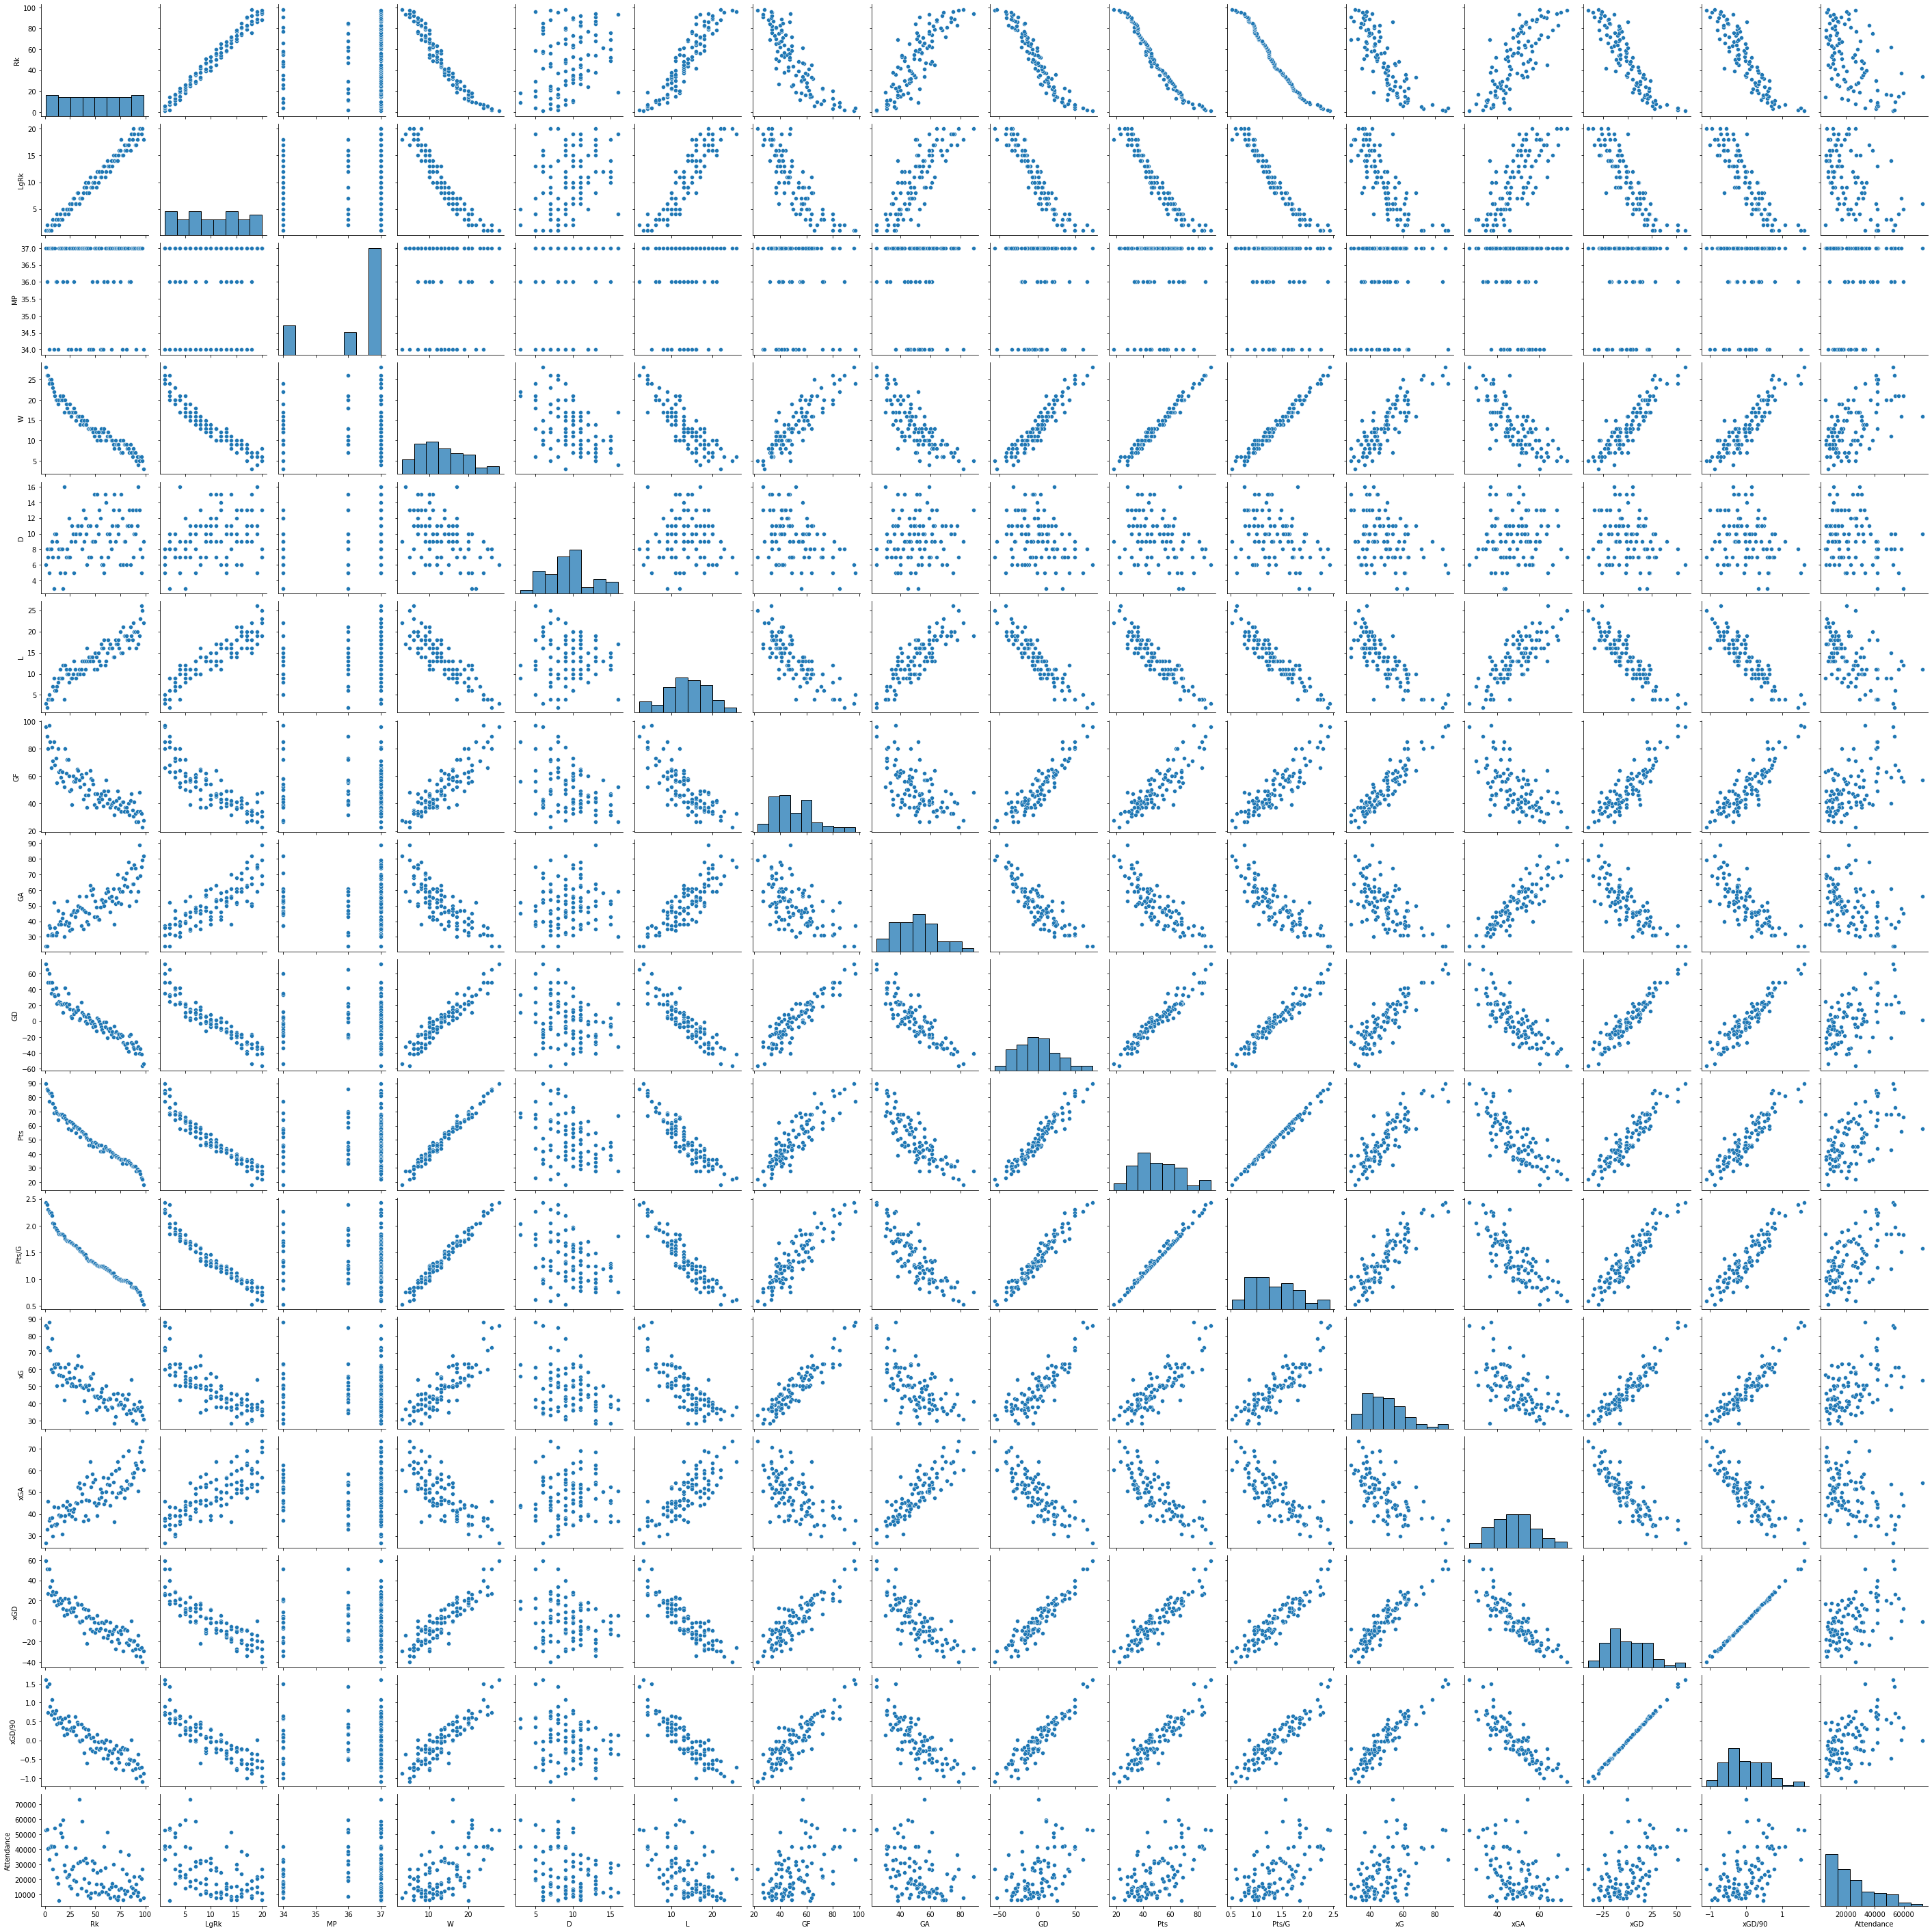

In [9]:
sns.pairplot(df)
plt.show()

## Exercici 1
Descarrega el dataset adjunt de dades oficials de la UEFA i selecciona un atribut del conjunt de dades. Calcula el p-valor i digues si rebutja la hipòtesi nul·la agafant un alfa de 5%. 

Tomaré la variable MP (partidos jugados por cada equipo), porque podría pensarse que tiene una distribución normal (gaussiana), suponiendo que todos los equipos jugaron la misma cantidad de partidos.

In [78]:
df['MP'].head()

0    37
1    36
2    37
3    34
4    37
Name: MP, dtype: int64

In [21]:
#Shapiro-Wilk Test
from scipy.stats import shapiro

stat, p = shapiro(df['MP'])
print('stat=%.3f, p=%.3f' % (stat, p))
print('El pvalue es:', p)
if p > 0.05:
    print('Probablemente Gaussiana')
else:
    print('Probablemente no Gaussiana')

stat=0.605, p=0.000
El pvalue es: 7.748343999291855e-15
Probably not Gaussian


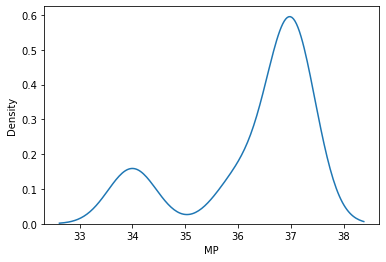

In [15]:
sns.kdeplot(df['MP'])
plt.show()

Descubro que no es gaussiano. Esto seguramente es porque hay ligas más largas que otra o porque se juegan más partidos vinculados a copas eliminatorias, que naturalmente hace que el equipo que llegue más lejos juegue más.
Rechazo la hipótesis nula de que la variable partidos jugados tiene una distribución normal.

Tomo ahora diferencia de goles (goles a favor menos goles en contra de cada equipo) que en el los gráficos del pairplot muestran una distribución que parece ser gaussiana.

In [20]:
#Prueba K ^ 2 de D'Agostino
from scipy.stats import normaltest

stat, p = normaltest(df['GD'])
print(p)
print('stat=%.3f, p=%.3f' % (stat, p))
print('El pvalue es:', p)
if p > 0.05:
    print('Probablemente Gaussiana')
else:
    print('Probablemente no Gaussiana')

0.2862734966289363
stat=2.502, p=0.286
El pvalue es: 0.2862734966289363
Probably Gaussian


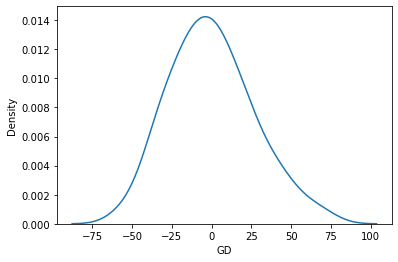

In [16]:
sns.kdeplot(df['GD'])
plt.show()

Confirmo que tiene una distribución gaussiana, lo cual es lógico porque los goles que anota un equipo los recibe el otro. Finalmente el número total de goles es el mismo, unos los anotan y otros los sufren.
No rechazo la hipótesis nula de que la variable diferencia de goles tiene una distribución normal, sino que la considero probable.

## Exercici 2
Amb el mateix dataset selecciona dos altres atributs del conjunt de dades. Calcula els p-valors i digues si rebutgen la hipòtesi nul·la agafant un alfa de 5%.

Tomaré las fórmulas de aquí [LINK](https://machinelearningmastery.com/statistical-hypothesis-tests-in-python-cheat-sheet/)

Tomaré las variables de goles a favor y partidos ganados.

In [24]:
# Pearson's Correlation test
from scipy.stats import pearsonr

stat, p = pearsonr(df['W'], df['GF'])
print('stat=%.3f, p=%.3f' % (stat, p))
print('El pvalue es:', p)
if p > 0.05:
    print('Probablemente independente')
else:
    print('Probablemente dependiente')

stat=0.881, p=0.000
El pvalue es: 6.202290466382284e-33
Probablemente dependiente


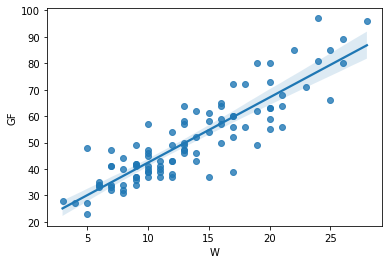

In [32]:
sns.regplot(x=df["W"], y=df["GF"])
plt.show()

Existe una correlación lineal entre los goles a favor y los partidos ganados, por lo cual descarto la hipótesis nula.

Tomaré ahora las variables de empates y goles en contra.

In [37]:
# Pearson's Correlation test
from scipy.stats import pearsonr

stat, p = pearsonr(df['D'], df['GA'])
print('stat=%.3f, p=%.3f' % (stat, p))
print('El pvalue es:', p)
if p > 0.05:
    print('Probablemente independente')
else:
    print('Probablemente dependiente')

stat=0.070, p=0.492
El pvalue es: 0.491616864928345
Probablemente independente


In [40]:
# Spearman's Rank Correlation Test
from scipy.stats import spearmanr

stat, p = spearmanr(df['D'], df['GA'])
print('stat=%.3f, p=%.3f' % (stat, p))
print('El pvalue es:', p)
if p > 0.05:
    print('Probablemente independente')
else:
    print('Probablemente dependiente')

stat=0.096, p=0.347
El pvalue es: 0.34658900442936014
Probablemente independente


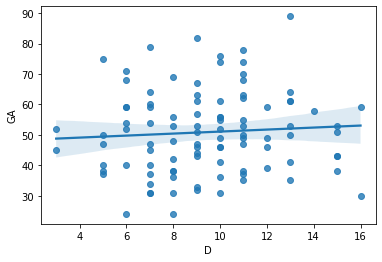

In [38]:
sns.regplot(x=df["D"], y=df["GA"])
plt.show()

La variables parecen no tenere correlación entre ellas, así que considero probabla la variable nula que afirma la independencia entra los datos.

## Exercici 3
Continua amb el conjunt de dades adjunt i selecciona tres atributs del conjunt de dades. Calcula el p-valor i digues si rebutja la hipòtesi nul·la agafant un alfa de 5%.

Tomo las variables puntos, partidos ganados y goles a favor

In [76]:
# Friedman Test
from scipy.stats import friedmanchisquare

stat, p = friedmanchisquare(df['Pts'], df['W'], df['GF'])
print('stat=%.3f, p=%.3f' % (stat, p))
print('El pvalue es:', p)
if p > 0.05:
    print('Probablemente la misa distribución')
else:
    print('Probablemente distribución diferente')

stat=149.318, p=0.000
El pvalue es: 3.7674310124428305e-33
Probablemente distribución dferente


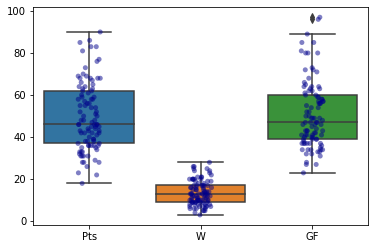

In [75]:
df3=pd.DataFrame([df.Pts, df.W,df.GF]).transpose()

sns.boxplot(data=df3)
ax = sns.stripplot(data=df3, color='darkblue', alpha= 0.5, jitter=0.1)
plt.show()


Por la distribución diferente rechazo la variable nula